In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist

# Bayesian inference

In [52]:
N = 1000

success_prob = 0.3
D = np.random.binomial(n=1, p=success_prob, size=N)

# domain
theta_range = np.linspace(0, 1, 1000)

# prior
a = 2
b = 8
prior = stats.beta.pdf(x=theta_range, a=a, b=b)

# the sampling dist. aka likelihood
likelihood = stats.binom.pmf(k=np.sum(D), n=len(D), p=theta_range)

# Posterior
posterior = (likelihood * prior) / (np.sum(likelihood * prior))

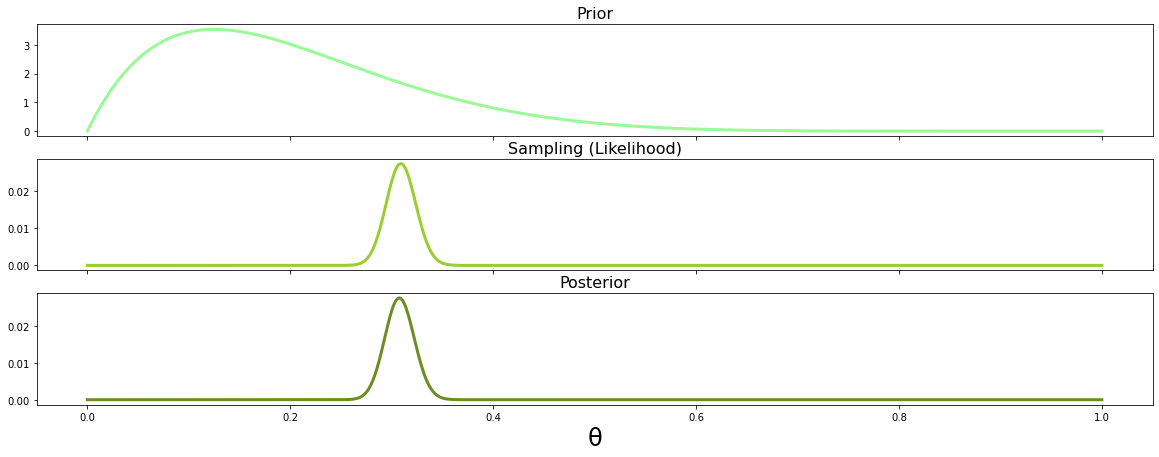

In [53]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)

axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)

axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)

axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()


This is very expensive due to the normalization factor. This can be solved by using a conjugate prior.

# Conjugate prior

Text(0.5, 1.0, 'Posterior')

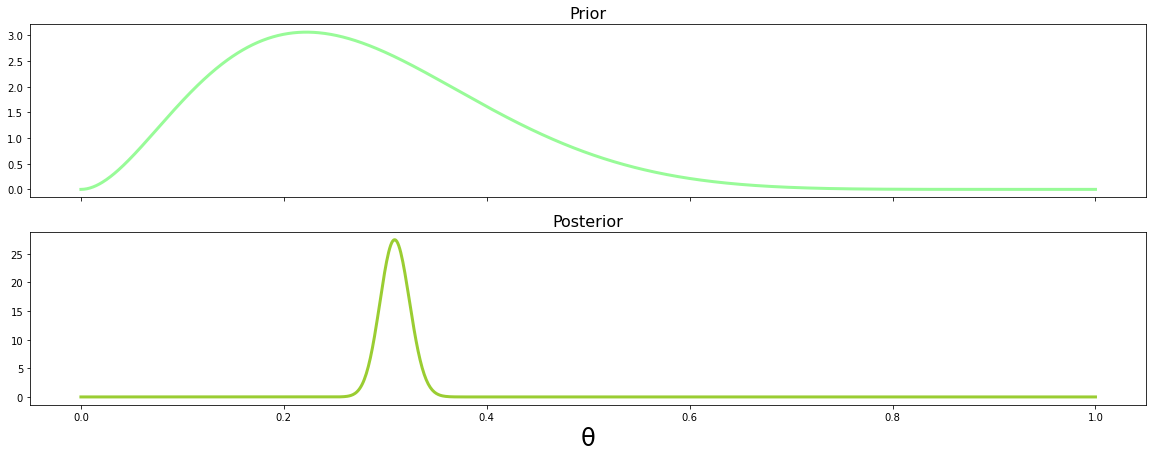

In [54]:
D = np.random.binomial(1, success_prob, N)

# success prob is exactly a = 4, b = 8, so now we have a prior of a=2, b = 8 = 0.2
a = 3
b = 8
a_prime = a + np.sum(D)
b_prime = b + N - np.sum(D)

prior = stats.beta.pdf(x=theta_range, a=a, b=b)
post = stats.beta.pdf(x=theta_range, a=a_prime, b=b_prime)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)

axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)

axes[1].plot(theta_range, post, label="Posterior", linewidth=3, color='yellowgreen')
axes[1].set_title("Posterior", fontsize=16)